# Importing Libraries

In [80]:
import math
from collections import Counter

# Training Set
#### Lecture location decision is based on the Weather conditions

In [81]:
lecture_data = [
    {"weather": "sunny", "temperature": "hot", "humidity": "high", "wind": "weak", "lecture_location": "in-campus"},
    {"weather": "sunny", "temperature": "hot", "humidity": "high", "wind": "normal", "lecture_location": "in-campus"},
    {"weather": "overcast", "temperature": "hot", "humidity": "high", "wind": "weak", "lecture_location": "in-campus"},
    {"weather": "rain", "temperature": "normal", "humidity": "high", "wind": "weak", "lecture_location": "online"},
    {"weather": "rain", "temperature": "cold", "humidity": "normal", "wind": "weak", "lecture_location": "online"},
    {"weather": "rain", "temperature": "cold", "humidity": "normal", "wind": "normal", "lecture_location": "online"},
    {"weather": "overcast", "temperature": "cold", "humidity": "normal", "wind": "normal", "lecture_location": "in-campus"},
    {"weather": "sunny", "temperature": "normal", "humidity": "high", "wind": "weak", "lecture_location": "in-campus"},
    {"weather": "sunny", "temperature": "cold", "humidity": "normal", "wind": "weak", "lecture_location": "in-campus"},
    {"weather": "rain", "temperature": "normal", "humidity": "normal", "wind": "weak", "lecture_location": "online"},
    {"weather": "sunny", "temperature": "normal", "humidity": "normal", "wind": "normal", "lecture_location": "in-campus"},
    {"weather": "overcast", "temperature": "normal", "humidity": "high", "wind": "normal", "lecture_location": "in-campus"},
    {"weather": "overcast", "temperature": "hot", "humidity": "normal", "wind": "weak", "lecture_location": "in-campus"},
    {"weather": "rain", "temperature": "normal", "humidity": "high", "wind": "normal", "lecture_location": "online"},
    {"weather": "sunny", "temperature": "normal", "humidity": "low", "wind": "high", "lecture_location": "online"},
    {"weather": "overcast", "temperature": "hot", "humidity": "low", "wind": "high", "lecture_location": "online"},
    {"weather": "rain", "temperature": "cold", "humidity": "high", "wind": "high", "lecture_location": "online"},
]

# dt_learning function based on the given Algorithm (4)

#### It builds the decision tree based on the lecture_data

In [82]:
def dt_learning(examples, attributes, parent_examples=None):
    if not examples:
        return most_common_class(parent_examples)
    elif all_same_class(examples):
        return examples[0]["lecture_location"]
    elif not attributes:
        return most_common_class(examples)
    else:
        best_feature = find_best_split(attributes, examples)
        tree = {"feature": best_feature, "branches": {}}

        # Creating the branch for each best_feature
        for value in set(example[best_feature] for example in examples):
            matching_examples = [e for e in examples if e[best_feature] == value]
            if matching_examples:
                subtree = dt_learning(
                    matching_examples, attributes - {best_feature}, examples
                )
                tree["branches"][value] = subtree
            else:
                tree["branches"][value] = most_common_class(parent_examples)
        return tree

# Most common class checker
#### returns the most repeated class from examples


In [83]:
def most_common_class(examples):
    class_counts = Counter(example["lecture_location"] for example in examples)
    return class_counts.most_common(1)[0][0]


# If all class are same checker
#### returns true/false if examples has classification same/not respectively

In [84]:
def all_same_class(examples):
    return all(e["lecture_location"] == examples[0]["lecture_location"] for e in examples)


# Entropy Calculator
#### returns the entropy for the given examples

In [85]:
def entropy(examples):
    class_counts = Counter(example["lecture_location"] for example in examples)
    probs = [count / len(examples) for count in class_counts.values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)


# Information gain function
#### It calculates the information gain obtained by splitting attributes

In [86]:
def information_gain(feature, examples):
    total_entropy = entropy(examples)
    value_entropies = [entropy([e for e in examples if e[feature] == v]) for v in set(e[feature] for e in examples)]
    weighted_avg_entropy = sum(
        len([e for e in examples if e[feature] == v]) / len(examples) * entropy
        for v, entropy in zip(set(e[feature] for e in examples), value_entropies)
    )
    return total_entropy - weighted_avg_entropy


# Finding the best split
### it returns the feature with the maxximum information gain

In [87]:
def find_best_split(attributes, examples):
    return max(attributes, key=lambda f: information_gain(f, examples))


# Calssifier for the decision tree
#### It classifies a new instace from the user input which uses the decision tree and returns the location

In [88]:
def classify_lecture(tree, instance):
    if not isinstance(tree, dict):
        return tree
    feature = tree["feature"]
    value = instance[feature]
    subtree = tree["branches"].get(value, None)

    # If value doesn't exist in the tree, use the most common class of the parent
    if subtree is None:
        return most_common_class(lecture_data)
    else:
        return classify_lecture(subtree, instance)

# Decision tree output



In [89]:
# attributes
attributes = {"weather", "temperature", "humidity", "wind"}

# Decision tree output
decision_tree = dt_learning(lecture_data, attributes)
print ("\n")
print(decision_tree)



{'feature': 'weather', 'branches': {'sunny': {'feature': 'humidity', 'branches': {'normal': 'in-campus', 'high': 'in-campus', 'low': 'online'}}, 'rain': 'online', 'overcast': {'feature': 'humidity', 'branches': {'normal': 'in-campus', 'high': 'in-campus', 'low': 'online'}}}}


# Input and Output
#### creates a new instance for the userinput the calls the classifier function which returns the location of lecture (online / in-campus)

###Test 1

In [90]:
#User input
weather = input("Enter weather (sunny, overcast, rain): ")
temperature = input("Enter temperature (hot, normal, cold): ")
humidity = input("Enter humidity (high, normal, low): ")
wind = input("Enter wind (weak, normal, high): ")

new_instance = {
    "weather": weather,
    "temperature": temperature,
    "humidity": humidity,
    "wind": wind,
}
# Classifying the lecture location
location = classify_lecture(decision_tree, new_instance)
print("The lecture will be held:", location)

Enter weather (sunny, overcast, rain): sunny
Enter temperature (hot, normal, cold): hot
Enter humidity (high, normal, low): high
Enter wind (weak, normal, high): weak
The lecture will be held: in-campus


### Test 2

In [91]:
# Get user input
weather = input("Enter weather (sunny, overcast, rain): ")
temperature = input("Enter temperature (hot, normal, cold): ")
humidity = input("Enter humidity (high, normal, low): ")
wind = input("Enter wind (weak, normal, high): ")

new_instance = {
    "weather": weather,
    "temperature": temperature,
    "humidity": humidity,
    "wind": wind,
}
# Classify the lecture location
location = classify_lecture(decision_tree, new_instance)
print("The lecture will be held:", location)

Enter weather (sunny, overcast, rain): rain
Enter temperature (hot, normal, cold): normal
Enter humidity (high, normal, low): high
Enter wind (weak, normal, high): weak
The lecture will be held: online


### Test 3

In [94]:
# Get user input
weather = input("Enter weather (sunny, overcast, rain): ")
temperature = input("Enter temperature (hot, normal, cold): ")
humidity = input("Enter humidity (high, normal, low): ")
wind = input("Enter wind (weak, normal, high): ")

new_instance = {
    "weather": weather,
    "temperature": temperature,
    "humidity": humidity,
    "wind": wind,
}
# Classify the lecture location
location = classify_lecture(decision_tree, new_instance)
print("The lecture will be held:", location)

Enter weather (sunny, overcast, rain): overcast
Enter temperature (hot, normal, cold): cold
Enter humidity (high, normal, low): low
Enter wind (weak, normal, high): high
The lecture will be held: online


# Visualization

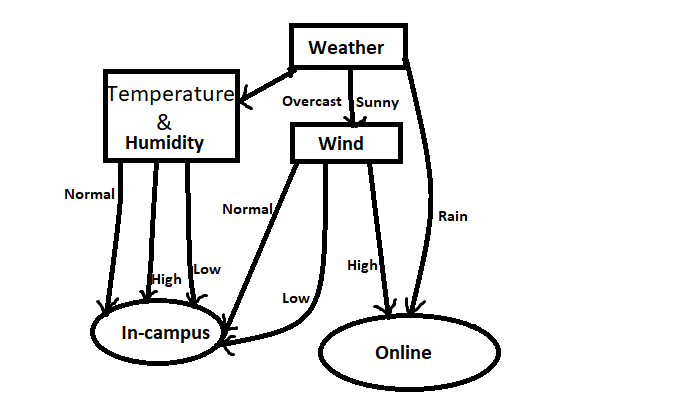